# Modeling

## Import Libraries and Load Data

In [58]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/housing_aspects.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
1,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062
2,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000
3,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503
4,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,2238,6819


In [59]:
df = df.round()
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,16477.000000,16477.000000,16477.000000,16477.000000,1.647700e+04,16477.000000,16477.000000,16477.000000,16477.000000,16477.000000,16477.000000,16477.000000,16477.000000,16477.000000,16477.000000,16477.000000
mean,450593.528434,3.274261,1.929902,1871.616071,1.347443e+04,1.498695,0.002428,0.138435,3.413546,7.428597,1622.057595,244.011106,1970.338472,56.906354,1854.359289,11856.668629
std,172271.320486,0.830194,0.594445,638.763629,3.588813e+04,0.556758,0.049213,0.568837,0.645361,0.909382,620.187633,377.345260,29.039342,332.120291,526.515699,25165.185777
min,169500.000000,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,312000.000000,3.000000,2.000000,1380.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1160.000000,0.000000,1951.000000,0.000000,1460.000000,5000.000000
50%,425000.000000,3.000000,2.000000,1802.000000,7.400000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1470.000000,0.000000,1973.000000,0.000000,1770.000000,7488.000000
75%,565000.000000,4.000000,2.000000,2310.000000,1.000000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1980.000000,480.000000,1995.000000,0.000000,2190.000000,9660.000000
max,913000.000000,6.000000,4.000000,3560.000000,1.651359e+06,4.000000,1.000000,4.000000,5.000000,11.000000,3560.000000,1990.000000,2015.000000,2015.000000,3410.000000,560617.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16477 entries, 0 to 16476
Data columns (total 16 columns):
price            16477 non-null float64
bedrooms         16477 non-null int64
bathrooms        16477 non-null float64
sqft_living      16477 non-null int64
sqft_lot         16477 non-null int64
floors           16477 non-null float64
waterfront       16477 non-null float64
view             16477 non-null float64
condition        16477 non-null int64
grade            16477 non-null int64
sqft_above       16477 non-null int64
sqft_basement    16477 non-null float64
yr_built         16477 non-null int64
yr_renovated     16477 non-null float64
sqft_living15    16477 non-null int64
sqft_lot15       16477 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.0 MB


## Linear Regression

In [61]:
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

### Baseline

In [62]:
baseline = ols(formula="price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15", data=df).fit()
baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1038.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:12:46   Log-Likelihood:            -2.1655e+05
No. Observations:               16477   AIC:                         4.331e+05
Df Residuals:                   16461   BIC:                         4.333e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.907e+06   8.68e+04     44.992      0.000    3.74e+06    4.08e+06
bedrooms      -1.766e+04   1497.085    -11.796      0.000   -2.06e+04   -1.47e+04
bathrooms      2.103e+04   2161.320      9.732      0.000    1.68e+04    2.53e+04
sqft_living      83.3536     14.219      5.862      0.000      55.483     111.225
sqft_lot          0.1533      0.038      3.986      0.000       0.078       0.229
floors         4.898e+04   2196.235     22.302      0.000    4.47e+04    5.33e+04
waterfront     6.294e+04   2.06e+04      3.053      0.002    2.25e+04    1.03e+05
view           1.572e+04   1841.435      8.539      0.000    1.21e+04    1.93e+04
condition      1.337e+04   1638.423      8.162      0.000    1.02e+04    1.66e+04
grade          8.401e+04   1595.603     52.650      0.000    8.09e+04    8.71e+04
sqft_above      -32.0707     14.159     -2.265      0.024     -59.823      -4.318
sqft_basement     3.0016     14.100      0.213      0.831     -24.635      30.638
yr_built      -2228.4904     44.976    -49.548      0.000   -2316.649   -2140.332
yr_renovated      6.8655      3.016      2.276      0.023       0.953      12.778
sqft_living15    54.8812      2.829     19.400      0.000      49.336      60.426
sqft_lot15       -0.2227      0.055     -4.028      0.000      -0.331      -0.114
==============================================================================
Omnibus:                      255.608   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.457
Skew:                           0.293   Prob(JB):                     1.13e-59
Kurtosis:                       3.230   Cond. No.                     4.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


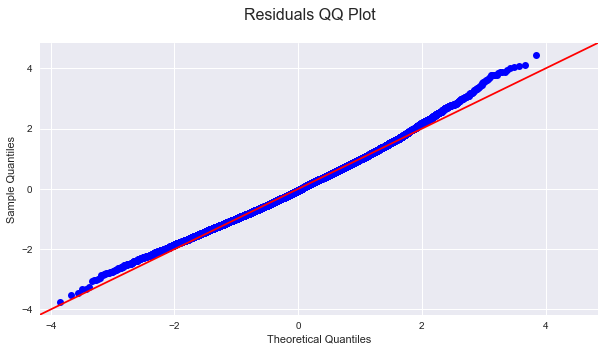

In [63]:
residuals = baseline.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

In [64]:
# R Squared is at only .584, meaning it covers 58.4% of the model
# some P values are over 5%, meaning there could be multicolinearity

### Model 1

In [65]:
# run an OLS model excluding everything with a P value of over 5%

In [86]:
# model with only normally distributed log transformations
model1 = ols(formula="price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + yr_renovated + sqft_living15 + sqft_lot15", data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1113.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:16:02   Log-Likelihood:            -2.1655e+05
No. Observations:               16477   AIC:                         4.331e+05
Df Residuals:                   16462   BIC:                         4.333e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.907e+06   8.68e+04     44.997      0.000    3.74e+06    4.08e+06
bedrooms      -1.766e+04   1496.973    -11.799      0.000   -2.06e+04   -1.47e+04
bathrooms      2.104e+04   2161.155      9.734      0.000    1.68e+04    2.53e+04
sqft_living      86.2864      3.519     24.522      0.000      79.389      93.183
sqft_lot          0.1533      0.038      3.987      0.000       0.078       0.229
floors         4.897e+04   2195.978     22.301      0.000    4.47e+04    5.33e+04
waterfront     6.299e+04   2.06e+04      3.056      0.002    2.26e+04    1.03e+05
view           1.572e+04   1841.228      8.538      0.000    1.21e+04    1.93e+04
condition      1.336e+04   1638.003      8.159      0.000    1.02e+04    1.66e+04
grade          8.401e+04   1595.539     52.651      0.000    8.09e+04    8.71e+04
sqft_above      -34.9984      3.366    -10.398      0.000     -41.596     -28.401
yr_built      -2228.5567     44.974    -49.552      0.000   -2316.711   -2140.403
yr_renovated      6.8600      3.016      2.274      0.023       0.948      12.772
sqft_living15    54.8816      2.829     19.401      0.000      49.337      60.426
sqft_lot15       -0.2229      0.055     -4.032      0.000      -0.331      -0.115
==============================================================================
Omnibus:                      255.605   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.452
Skew:                           0.293   Prob(JB):                     1.13e-59
Kurtosis:                       3.230   Cond. No.                     4.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


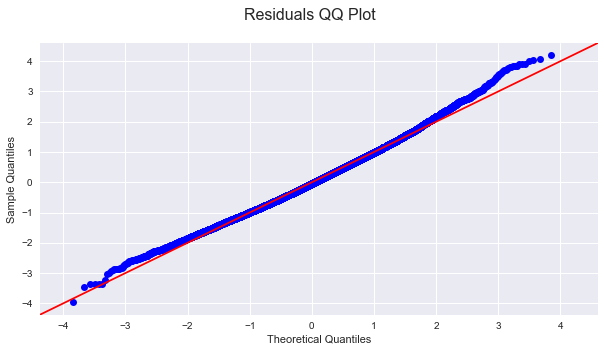

In [67]:
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

In [87]:
# we see that the R Squared acutally dropped by .001
# let's look further into multicolinearity among all columns


## Check for Multicolinearity

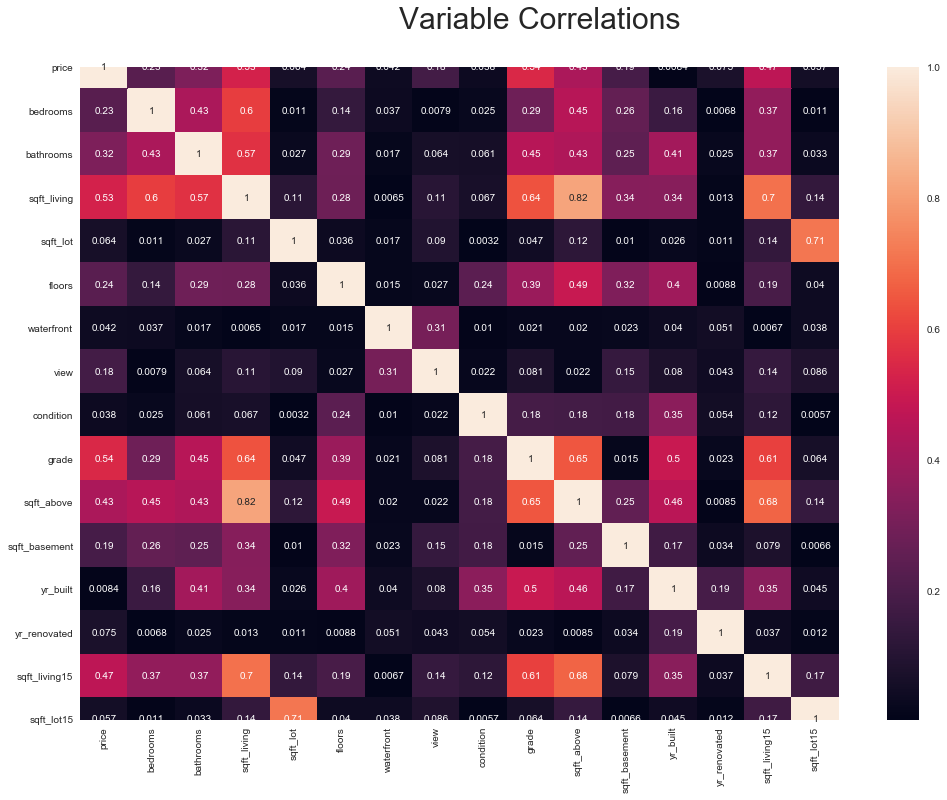

In [89]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [90]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [91]:
# usually any variables that correlate more than 80%
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Price')
display(corr_price_df)

Multicollinear Features


,Correlations,Features
0,0.818148,"[sqft_living, sqft_above]"
1,0.818148,"[sqft_above, sqft_living]"


Correlations with Price


,Correlations,Features
2,0.544888,grade
1,0.526053,sqft_living
4,0.470441,sqft_living15
3,0.425169,sqft_above
0,0.319053,bathrooms


In [72]:
# either sqft_living or sqft_above has to be dropped to elminate any multicolinearity
# the heatmap and correlations with price chart give us a good idea of what columns work best with price
# check for linearity in columns that have the most correlations with price
price = df['price']
bath = df['bathrooms']
bed = df['bedrooms']
grade = df['grade']
sqft_living15 = df['sqft_living15']
floors = df['floors']
view = df['view']
sqft_living = df['sqft_living']
sqft_above = df['sqft_above']

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 576x396 with 0 Axes>

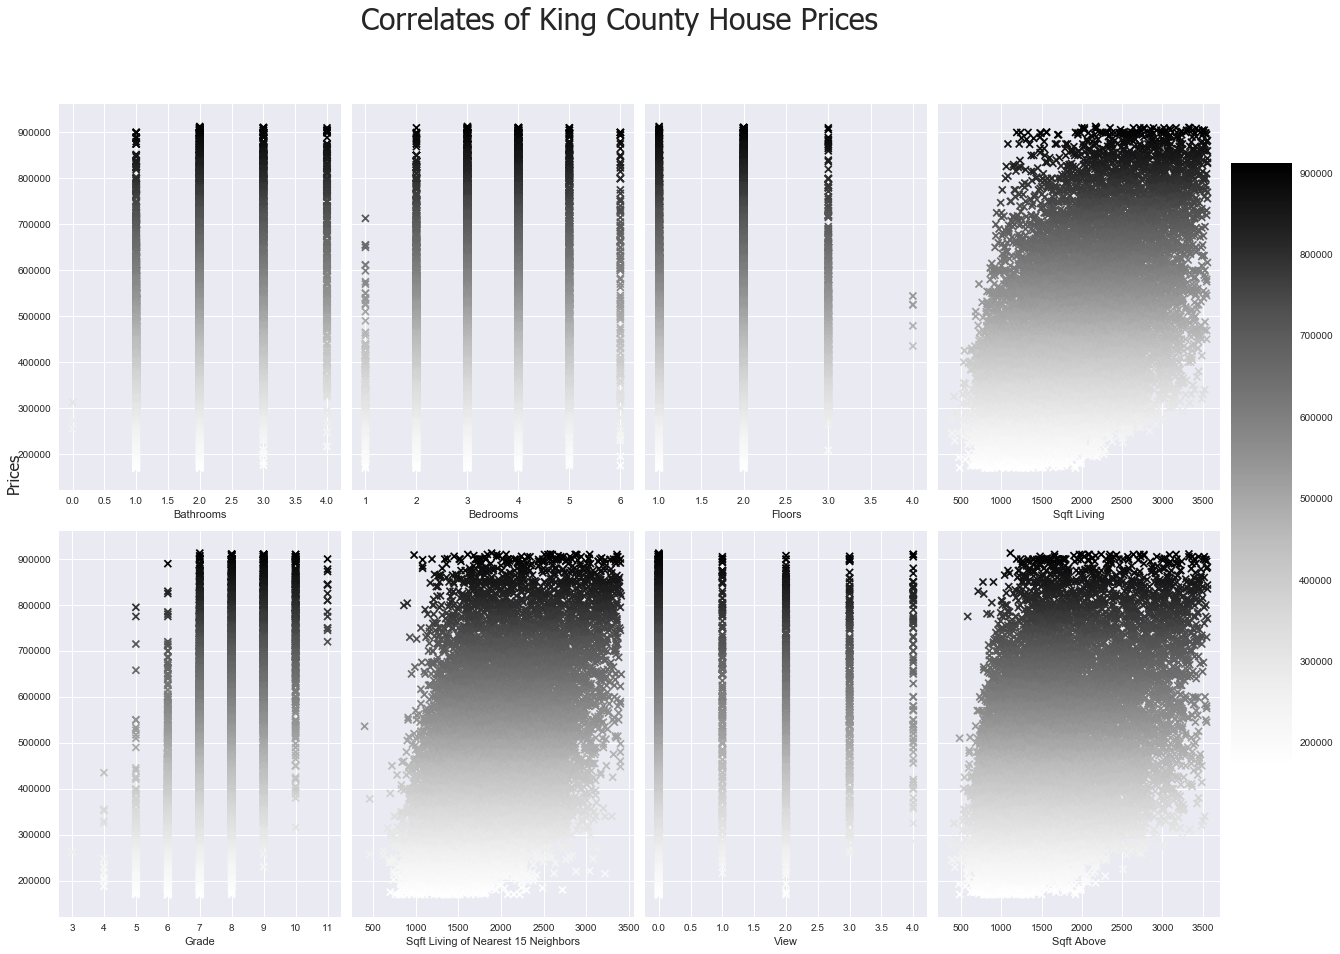

In [73]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Tahoma')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Tahoma')

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c = price, marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c = price, marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c = price, marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(floors, price, c = price, marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(view, price, c = price, marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(sqft_living, price, c = price, marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(sqft_above, price, c = price, marker = "x")
axes[1][3].set_xlabel('Sqft Above')


cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])
f.colorbar(sc, cbar_ax)

f.tight_layout()
plt.show()

In [74]:
# bedrooms, floors and view are not linear
# sqft_living is more linear than sqft_above so it will be the column included

### Model 2

In [93]:
model2 = ols(formula="price ~ bathrooms + grade + sqft_living + sqft_living15", data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2265.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:17:48   Log-Likelihood:            -2.1843e+05
No. Observations:               16477   AIC:                         4.369e+05
Df Residuals:                   16472   BIC:                         4.369e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.933e+05   9475.118    -20.400      0.000   -2.12e+05   -1.75e+05
bathrooms     -2832.4622   2241.053     -1.264      0.206   -7225.169    1560.244
grade          6.231e+04   1630.280     38.220      0.000    5.91e+04    6.55e+04
sqft_living      68.3757      2.802     24.405      0.000      62.884      73.867
sqft_living15    31.5485      3.024     10.432      0.000      25.621      37.476
==============================================================================
Omnibus:                      569.102   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.625
Skew:                           0.477   Prob(JB):                    3.13e-137
Kurtosis:                       2.921   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


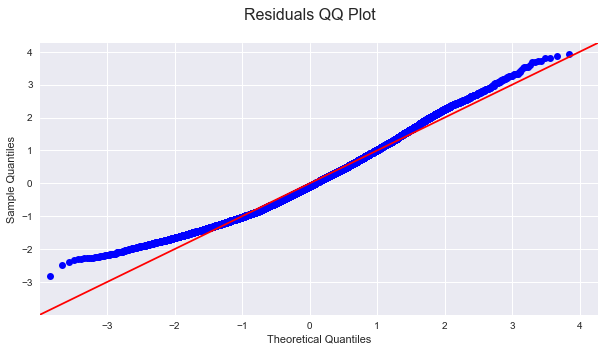

In [76]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

In [77]:
# when dropping additional values with lower correlations, the R Squared value dropped to 44.9%

## Checking Variable Distributions

In [94]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['bathrooms', 'grade', 'sqft_living', 'sqft_living15']])
df_std = std_scale.transform(df[['bathrooms', 'grade', 'sqft_living', 'sqft_living15']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['bathrooms', 'grade', 'sqft_living', 'sqft_living15']])
df_minmax = minmax_scale.transform(df[['bathrooms', 'grade', 'sqft_living', 'sqft_living15']])

In [95]:
print('Mean after standardization:\nbathrooms={:.2f}, grade={:.2f}, sqft_living={:.2f}, sqft_living15={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean(), df_std[:,3].mean()))
print('\nStandard deviation after standardization:\nbathrooms={:.2f}, grade={:.2f}, sqft_living={:.2f}, sqft_living15={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].std(), df_std[:,3].std()))

Mean after standardization:
bathrooms=0.00, grade=0.00, sqft_living=0.00, sqft_living15=-0.00

Standard deviation after standardization:
bathrooms=1.00, grade=1.00, sqft_living=1.00, sqft_living15=1.00


In [96]:
print('Min-value after min-max scaling:\nbathrooms={:.2f}, grade={:.2f}, sqft_living={:.2f}, sqft_living15={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(), df_minmax[:,3].min()))
print('\nMax-value after min-max scaling:\nbathrooms={:.2f}, grade={:.2f}, sqft_living={:.2f}, sqft_living15={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max(), df_minmax[:,3].max()))

Min-value after min-max scaling:
bathrooms=0.00, grade=0.00, sqft_living=0.00, sqft_living15=0.00

Max-value after min-max scaling:
bathrooms=1.00, grade=1.00, sqft_living=1.00, sqft_living15=1.00


In [123]:
outcome = 'price'
x_cols = ['bathrooms', 'grade', 'sqft_living', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2265.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:34:35   Log-Likelihood:            -2.1843e+05
No. Observations:               16477   AIC:                         4.369e+05
Df Residuals:                   16472   BIC:                         4.369e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.933e+05   9475.118    -20.400      0.000   -2.12e+05   -1.75e+05
bathrooms     -2832.4622   2241.053     -1.264      0.206   -7225.169    1560.244
grade          6.231e+04   1630.280     38.220      0.000    5.91e+04    6.55e+04
sqft_living      68.3757      2.802     24.405      0.000      62.884      73.867
sqft_living15    31.5485      3.024     10.432      0.000      25.621      37.476
==============================================================================
Omnibus:                      569.102   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.625
Skew:                           0.477   Prob(JB):                    3.13e-137
Kurtosis:                       2.921   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


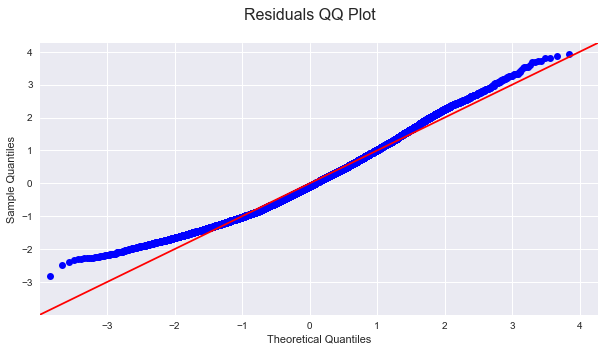

In [124]:
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

In [ ]:
# the P value of bathroom is over 5% so it will be dropped

In [125]:
outcome = 'price'
x_cols = ['bathrooms', 'grade', 'sqft_living', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model4 = ols(formula=formula, data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     2265.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:35:32   Log-Likelihood:            -2.1843e+05
No. Observations:               16477   AIC:                         4.369e+05
Df Residuals:                   16472   BIC:                         4.369e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.933e+05   9475.118    -20.400      0.000   -2.12e+05   -1.75e+05
bathrooms     -2832.4622   2241.053     -1.264      0.206   -7225.169    1560.244
grade          6.231e+04   1630.280     38.220      0.000    5.91e+04    6.55e+04
sqft_living      68.3757      2.802     24.405      0.000      62.884      73.867
sqft_living15    31.5485      3.024     10.432      0.000      25.621      37.476
==============================================================================
Omnibus:                      569.102   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.625
Skew:                           0.477   Prob(JB):                    3.13e-137
Kurtosis:                       2.921   Cond. No.                     2.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\daveb\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


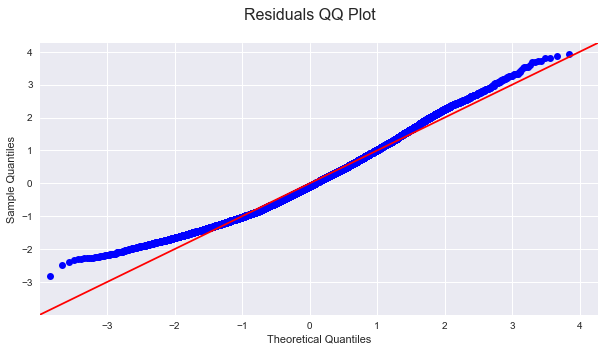

In [126]:
residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

## Homoscedasticity

Text(0.5, 0.99, 'Residuals Scatterplot')

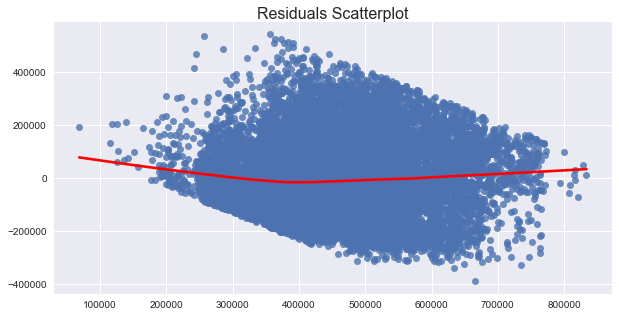

In [127]:
plt.figure(figsize=(10,5))
sns.regplot(x=model4.predict(), y=model4.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [128]:
# the model has a blob shape so it has homoscedasticity

## Model Validation

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_lot15'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X)

       sqft_living  grade  sqft_living15
0             2570      7           1690
1              770      6           2720
2             1960      7           1360
3             1680      8           1800
4             1715      7           2238
...            ...    ...            ...
16472         1310      8           1330
16473         1530      8           1530
16474         2310      8           1830
16475         1020      7           1020
16476         1020      7           1020

[16477 rows x 3 columns]


In [130]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
difference = 1 - (test_mse / train_mse)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('Difference: ', difference*100, '%')

Train Mean Squared Error: 19203144121.519234
Test Mean Squared Error: 18988475361.457714
Difference:  1.1178833981720704 %


In [131]:
# model 4 shows a standard error of l1.12%